In [21]:
import pandas as pd
df= pd.read_csv('City_time_series.csv')

In [22]:
# calculate the percentage of NaN values in each column
nan_percent = df.isnull().mean()

# select the columns with less than 75% NaN values
df = df[nan_percent[nan_percent < 0.75].index]

In [23]:
mid = pd.DataFrame()

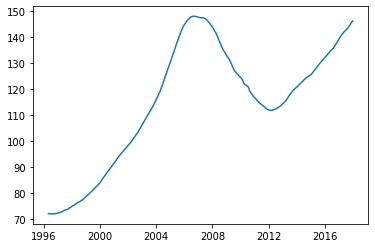

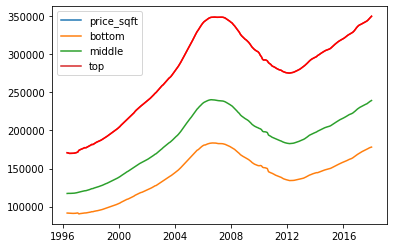

In [24]:
mid['date']=df.Date
df.drop('Date', axis=1, inplace=True)
mid.reset_index()
mid['date'] = pd.to_datetime(mid['date'], format='%Y-%m-%d')
mid['date_obj'] = mid['date'].dt.date
df.drop('RegionName', axis=1, inplace=True)
df['ZHVIPerSqft_AllHomes'].interpolate(method='polynomial', order=3, inplace=True)
df['ZHVI_BottomTier'].interpolate(method='polynomial', order=3, inplace=True)
df['ZHVI_MiddleTier'].interpolate(method='polynomial', order=3, inplace=True)
df['ZHVI_TopTier'].interpolate(method='polynomial', order=3, inplace=True)   
df_zhvi=pd.DataFrame()
df_zhvi['price_sqft']=df.ZHVIPerSqft_AllHomes
df_zhvi['bottom']=df.ZHVI_BottomTier
df_zhvi['middle']=df.ZHVI_MiddleTier
df_zhvi['top']=df.ZHVI_TopTier
df=df_zhvi
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
mid=mid.iloc[2:]
mid=mid.reset_index()
df['date']=mid.date_obj
df=df.groupby('date').mean()


import matplotlib.pyplot as plt

#columns = [col for col in df.columns if col != 'date']

# Create a figure and a set of subplots
fig, ax = plt.subplots()
fig, bx = plt.subplots()

columns=df.columns

for col in columns:
    # Select the rows where the values in the column are below 50000
    df_below_75k = df[df[col] < 75000]

    # Plot the values in the column
    ax.plot(df_below_75k[col], label=col)

for col in columns:
    # Select the rows where the values in the column are below 50000
    df_above_75k = df[df[col] >= 75000]

    # Plot the values in the column
    bx.plot(df_above_75k[col], label=col)

# Plot the values below 75,000 on the first subplot
ax.plot(df_below_75k[col], color='blue')

# Filter the dataframe to get the values above 75,000

# Plot the values above 75,000 on the second subplot
bx.plot(df_above_75k[col], color='red')
bx.legend()
# Show the plot
plt.show()

In [25]:
df.head()

,price_sqft,bottom,middle,top
date,,,,
1996-04-30,71.963267,91532.682451,117240.600049,170687.358155
1996-05-31,71.902306,91421.637058,117369.022727,170345.851166
1996-06-30,71.862846,91227.044938,117304.798554,169834.284163
1996-07-31,71.875017,91151.396968,117373.635742,169869.215154
1996-08-31,71.851924,91119.498795,117434.830084,169905.513973


In [26]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

import streamlit as st
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

df['date']=df.index
df["date"] = pd.to_datetime(df["date"])
df = df.assign(year=df["date"].dt.year, month=df["date"].dt.month)

# Add widgets to allow the user to select a year and month and input the number of sqft
year = st.sidebar.slider("Select a year", min_value=1996, max_value=2017, value = 2008, step=1)
month = st.sidebar.slider("Select a month", min_value=1, max_value=12, value=8, step=1)
sqft = st.sidebar.number_input("Enter the number of sqft", value=1000)

# Select the data point for the selected year and month
selected_date = pd.to_datetime(f"{year}-{month}")
selected_point = df[(df.year == year) & (df.month == month)]

df['date']=df.index
df["date_dt"] = pd.to_datetime(df["date"])
df= df.assign(year=df["date_dt"].dt.year, month=df["date_dt"].dt.month).drop("date", axis=1)

Text(0, 0.5, 'Price')

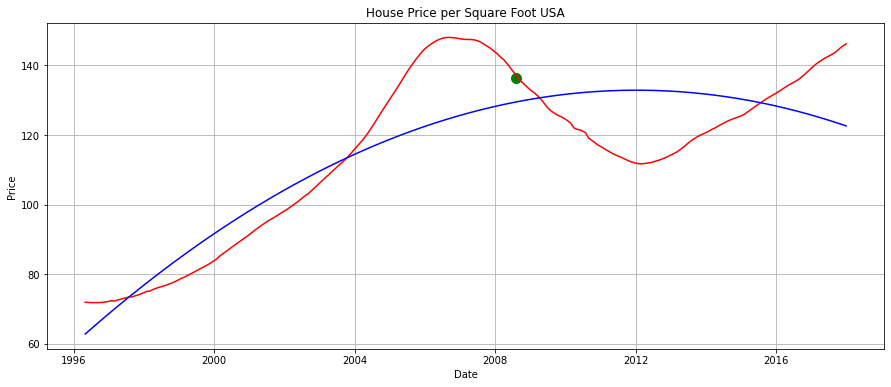

In [27]:
# add an ordinal column because sklearn doesn't work with datetimes
df['ordinal'] = df.index.map(pd.Timestamp.toordinal)
model = LinearRegression()

# extract x and y from dataframe data
x = df[['ordinal']]
y = df[['price_sqft']]
from sklearn.preprocessing import PolynomialFeatures

# create a PolynomialFeatures object with degree 4
poly_features = PolynomialFeatures(degree=4)

# transform the ordinal feature into a polynomial feature
x_poly = poly_features.fit_transform(x)

# fit the model using the polynomial features
model = LinearRegression()
model.fit(x_poly, y)

# predict y values for the original x values using the polynomial model
y_pred = model.predict(x_poly)



# plot the original data and the polynomial model
ax1 = df.plot(y='price_sqft', c='r', figsize=(15, 6), grid=True, legend=False)
ax1.plot(df.date_dt, y_pred, label='Polynomial Model of Degree 4', c='blue')
# Add the selected data point to the plot
ax1.scatter(selected_date, selected_point.price_sqft, c="green", label="Selected Point", s=100)
plt.title("House Price per Square Foot USA")
plt.grid('auto')
plt.xlabel("Date")
plt.ylabel("Price")

In [28]:
# Calculate the predicted house price
predicted_price = sqft * float(selected_point.price_sqft)
print(predicted_price)

136272.7446256122


In [29]:
import calendar
# Determine the last day of the month
last_day = calendar.monthrange(year, month)[1]

# Create a Timestamp object using the year, month, and last day of the month
selected_date = pd.to_datetime(f'{year}-{month}-{last_day}')

In [31]:
df.reset_index(inplace=True, drop=True)

In [46]:
# Add widgets to allow the user to select a year and month and input the number of sqft
year = st.sidebar.slider("Select a year", min_value=1996, max_value=2017, value = 2008, step=1)
month = st.sidebar.slider("Select a month", min_value=1, max_value=12, value=8, step=1)
sqft = st.sidebar.number_input("Enter the number of sqft", value=1000)

# Select the data point for the selected year and month
selected_date = pd.to_datetime(f"{year}-{month}")
selected_point = df[(df.year == year) & (df.month == month)]

In [47]:
# Assume that the id of the current row is 149 and the y_pred column is named "y_pred"
id = selected_point.index

In [48]:
df['y_pred']=y_pred
y_pred_shifted = df["y_pred"].shift(-1)

In [49]:
# Store the value of the y_pred element with index 148 in a variable
a = df.loc[id, "y_pred"].values[0]
b = y_pred_shifted[id].values[0]

In [52]:
print(a, b)

129.6308079509472 129.78700188102084


In [53]:
if b > a:
    trend= 'increase'
else:
    trend= "decrease"
# Display the predicted house price and trend
st.write(f"The predicted price of a {sqft} sqft house on {selected_date.strftime('%B %d, %Y')} is ${predicted_price:,.2f}")
st.write(f"Based on the regression line, the price is expected to {trend} in the future.")